In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

ecos 에서 cpi
소비자 물가 지

세계의 cpi
fred
shades는 recession
Source: Organization for Economic Co-operation and Development OECD fred라고 써도됨

In [3]:
# fred에서 data가져올 때
import pandas_datareader.data as pdr
import datetime

In [5]:
start_date = datetime.datetime(1980, 1, 1)
end_date = datetime.datetime(2024, 9, 30)

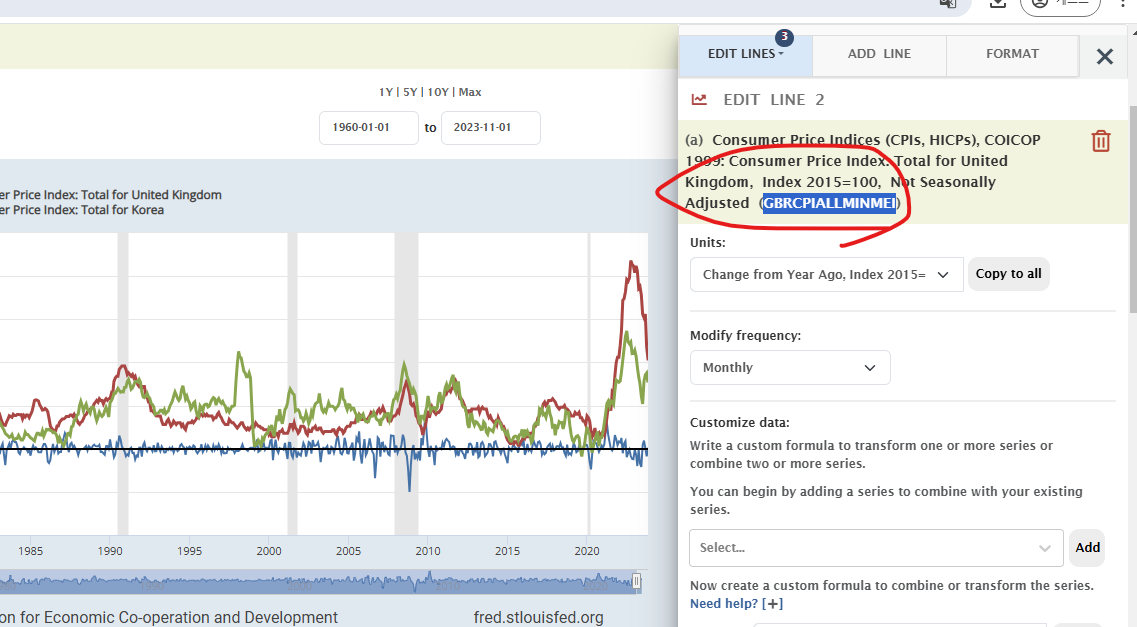

In [6]:
# 위 사진에 있는 괄호안 문자열 가져오기
uk_cpi = pdr.DataReader("GBRCPIALLMINMEI", "fred", start_date, end_date)

In [7]:
uk_cpi

,GBRCPIALLMINMEI
DATE,
1980-01-01,28.22954
1980-02-01,28.63232
1980-03-01,29.02360
1980-04-01,30.01330
1980-05-01,30.28950
...,...
2024-04-01,132.20000
2024-05-01,132.70000
2024-06-01,133.00000


In [8]:
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [15]:
df = pd.read_csv("AirPassengers.csv")

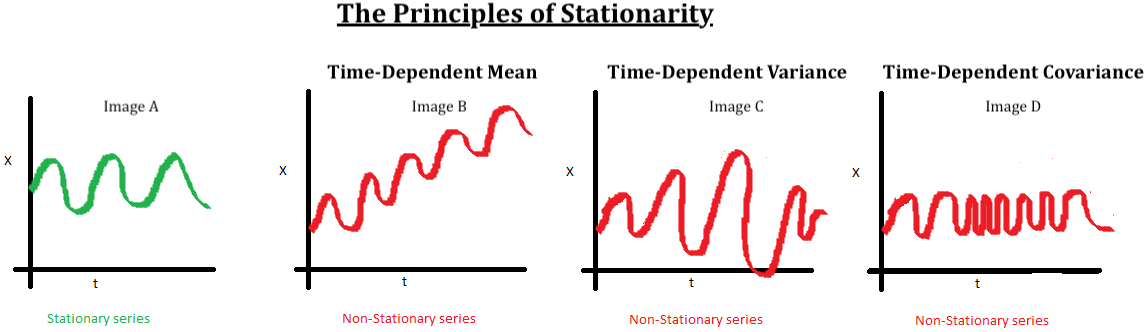

# Weak stationary
- mean and variance do not change over time

# Strict stationary
- 너무 동일

## 시계열에서는 stationary가 되기 위해서 다음과 같은 조건을 만족해야 함
- constant mean has to be 일정
- constant variance has to be 일정
- constant co-variance, in all sector has to be 일정

A 정상성. 시간에 따라 평균이 일정
C step function 시간에 따라 평균값이 달라짐 non stationary
B 변동성은 일정한데 trend가 있는 경우. 정상성이 아니다. 허나 trend를 없애면 정상성 데이터
D 평균은 동일하나 변동성의 magnitude가 너무 크다. = standard diviation이 크다. 정상성이 아니다.

In [11]:
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    144 non-null    object
 1   value   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [16]:
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace = True)
df.head()

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


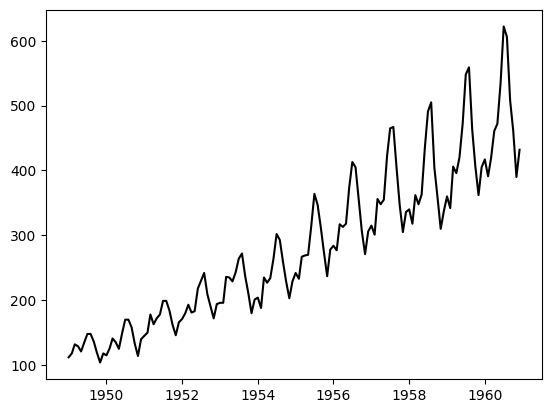

In [19]:
plt.plot(df["value"], c = "k")

In [20]:
# 이 데이터가 정상성인지 확인해보자

### Dicky-Fuller Test

- ADF test (Augmented Dicky Fuller test)
- Null hypothesis ($H_o$) : time series is not stationary.
- if the returned p-value > 0.05 => accept
  - time series is not stationary

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
adfuller(df["value"])

(0.8153688792060528,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

0.81 = test statistics
0.991 = 이걸 봐야함
0.5보다 크기에 정상성이 아님
데이터를 손질하면 됨
cpi를 인플레이션 growth rate로 바꾸면 가능하다

In [23]:
# 데이터를 정상성으로 바꾸자

In [24]:
uploaded = files.upload()

Saving LTOTALNSA.csv to LTOTALNSA.csv


In [34]:
# light weight vehicle sales임 fred가면 나옴
df = pd.read_csv("LTOTALNSA.csv")

In [26]:
df.head()

,DATE,LTOTALNSA
0,1976-01-01,864.6
1,1976-02-01,973.3
2,1976-03-01,1216.1
3,1976-04-01,1163.2
4,1976-05-01,1176.1


In [38]:
df["DATE"] = pd.to_datetime(df["DATE"])
df.set_index("DATE", inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 555 entries, 1976-01-01 to 2022-03-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LTOTALNSA  555 non-null    float64
dtypes: float64(1)
memory usage: 8.7 KB


In [40]:
df.head()

,LTOTALNSA
DATE,
1976-01-01,864.6
1976-02-01,973.3
1976-03-01,1216.1
1976-04-01,1163.2
1976-05-01,1176.1


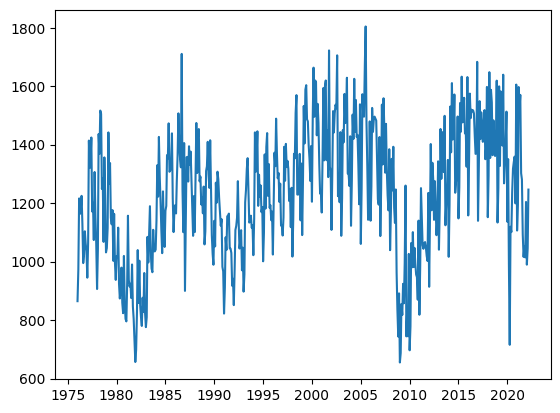

In [41]:
plt.plot(df["LTOTALNSA"]) # FRED에 나오는 것과 동일

In [42]:
# 지금은 monthly인데 변동성이 너무 커서 yearly로 바꾸겠다!

In [43]:
yearly_df = df.resample(rule = "Y").mean()
yearly_df.head()

<ipython-input-43-0e1e6a80c6dc>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_df = df.resample(rule = "Y").mean()


,LTOTALNSA
DATE,
1976-12-31,1080.816667
1977-12-31,1206.825000
1978-12-31,1248.416667
1979-12-31,1146.533333
1980-12-31,933.125000


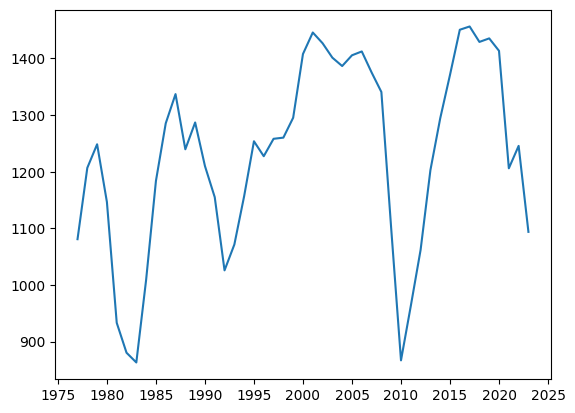

In [44]:
plt.plot(yearly_df)

In [45]:
# 마지막 연도 떨어지는 이유 : 달이 3월가지 밖에 없어서
# 빼는게 좋다
quaterly_df = df.resample(rule = "Q").mean() # sum을 보고 싶으면 대신 쓰는데 mean권장
quaterly_df.head()

<ipython-input-45-296ca93f496b>:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quaterly_df = df.resample(rule = "Q").mean()


,LTOTALNSA
DATE,
1976-03-31,1018.000000
1976-06-30,1188.066667
1976-09-30,1049.966667
1976-12-31,1067.233333
1977-03-31,1141.466667


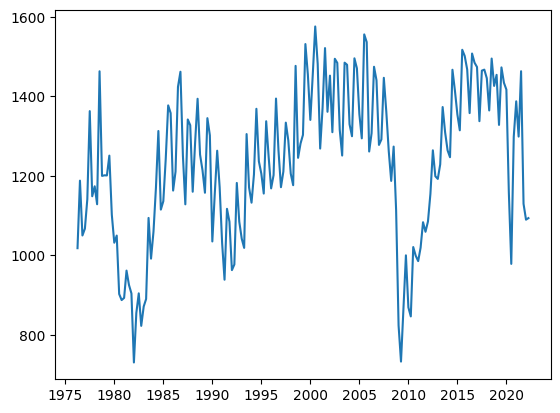

In [46]:
plt.plot(quaterly_df)

In [47]:
# 변동성이 보이지만 yearly에서 볼 수 있는 트렌드도 볼 수 있다

In [48]:
df_shift = df.copy()
df_shift.head()

,LTOTALNSA
DATE,
1976-01-01,864.6
1976-02-01,973.3
1976-03-01,1216.1
1976-04-01,1163.2
1976-05-01,1176.1


In [49]:
df_shift["shift_1"] = df_shift["LTOTALNSA"].shift(1) # 1개만 쉬프트로 바꿔라
df_shift.head() # nan은 전월 없어서그럼

,LTOTALNSA,shift_1
DATE,,
1976-01-01,864.6,NaN
1976-02-01,973.3,864.6
1976-03-01,1216.1,973.3
1976-04-01,1163.2,1216.1
1976-05-01,1176.1,1163.2


In [51]:
df_shift["shift_2"] = df_shift["LTOTALNSA"].shift(2) # shift 왜하냐 전월대비 현재 얼마 영향 미쳤는지 보려고
df_shift.head()

,LTOTALNSA,shift_1,shift_2
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,864.6,NaN
1976-03-01,1216.1,973.3,864.6
1976-04-01,1163.2,1216.1,973.3
1976-05-01,1176.1,1163.2,1216.1


In [52]:
# shift(-1) 내일이 오늘 미치는 영향

In [53]:
df_rolling = df.copy()

In [54]:
df_rolling["quarter_rolling"] = df_rolling["LTOTALNSA"].rolling(window = 3).mean()

In [55]:
df_rolling["year_rolling"] = df_rolling["LTOTALNSA"].rolling(window = 12).mean()

In [56]:
df_rolling

,LTOTALNSA,quarter_rolling,year_rolling
DATE,,,
1976-01-01,864.600,NaN,NaN
1976-02-01,973.300,NaN,NaN
1976-03-01,1216.100,1018.000000,NaN
1976-04-01,1163.200,1117.533333,NaN
1976-05-01,1176.100,1185.133333,NaN
...,...,...,...
2021-11-01,1014.411,1027.120333,1279.039750
2021-12-01,1203.993,1089.806333,1245.581083
2022-01-01,989.560,1069.321333,1235.853917


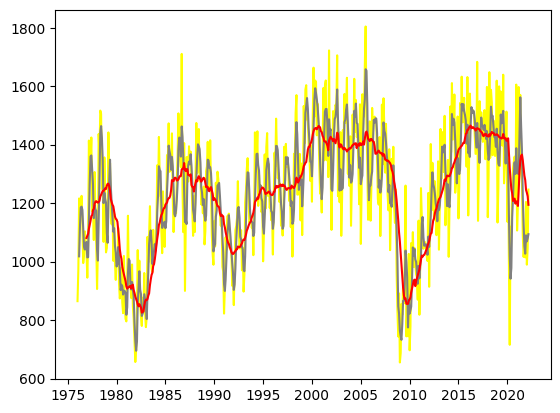

In [64]:
plt.plot(df_rolling["LTOTALNSA"], c = "yellow")
plt.plot(df_rolling["quarter_rolling"], c = "gray")
plt.plot(df_rolling["year_rolling"], c = "r")
plt.show()